# load modules


In [22]:
import pandas as pd
import torch
import torch.nn as nn
import tqdm
import torch.nn.functional as F
import os
import numpy as np
import random
import re
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, ks_1samp, kstest
import math
import torchvision
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data

# fox attempt 1: normalized data, relu, first full dataset success

image 17113:


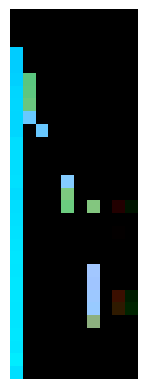

image 7937:


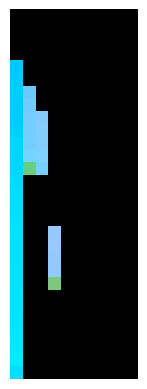

image 31880:


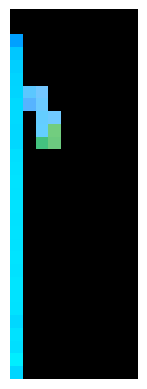

Consistency:


Percentage of consistant images = 35.50% vs. 97.51% in training data

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 45.86%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  81.97%
inconsistency due to zgap in branch 34.24%
inconsistency due to last descendant dont exist 0.27%

Number of images with two or more inconsistencies = 12285, which is  49.66%
That corresponds to 32.04% of all images


Of all images, 29.58% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 52.87% have gap between branches inconsistency
Of all images, 22.09% have gap within branch inconsistency
Of all images, 0.18% have last descendant inconsistency



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 422039
perc of occurences where mass is not preserved = 29.30% vs. 25.77% in training data




monotonicity threshold = -0.

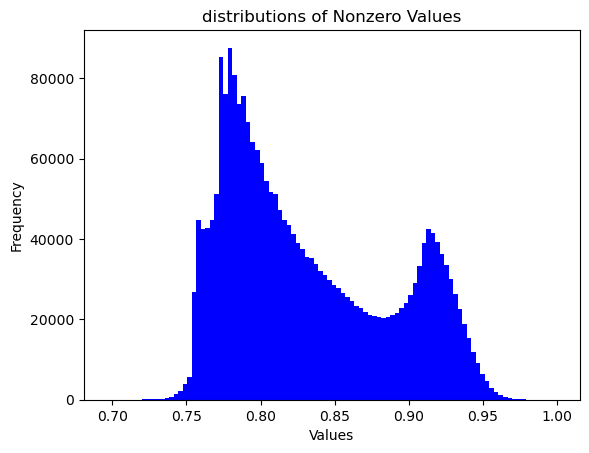

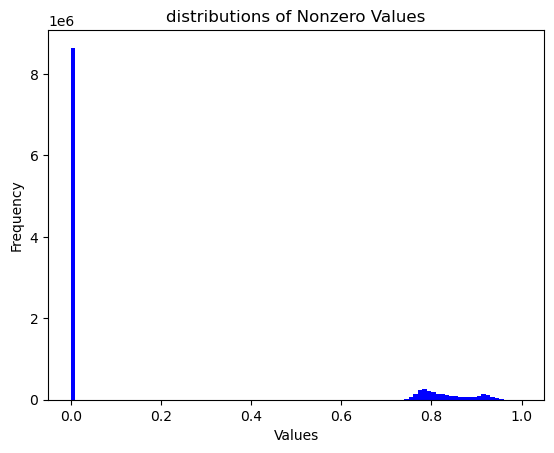

number of nonzero values = 2475374
Generated images:


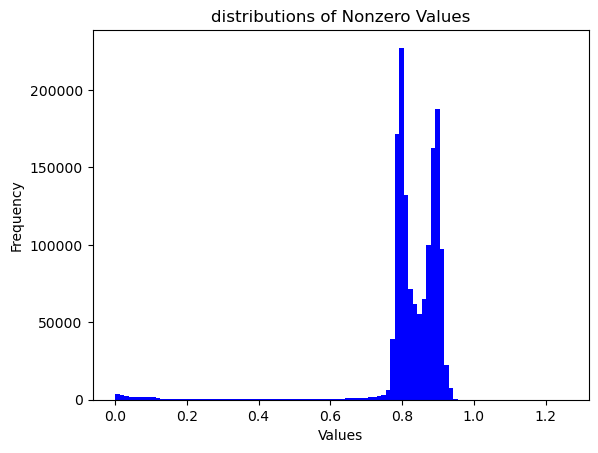

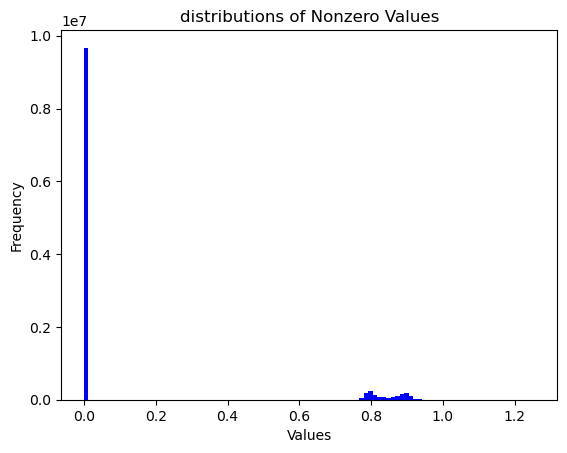

number of nonzero values = 1454211


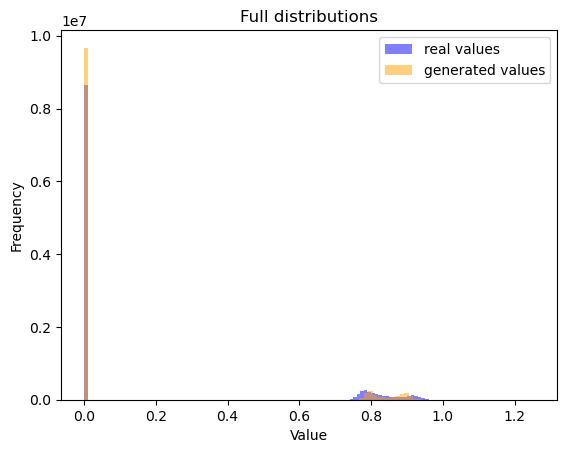

Full distribution:
KS Statistic: 0.09556709336997304
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0956 > 0.0006


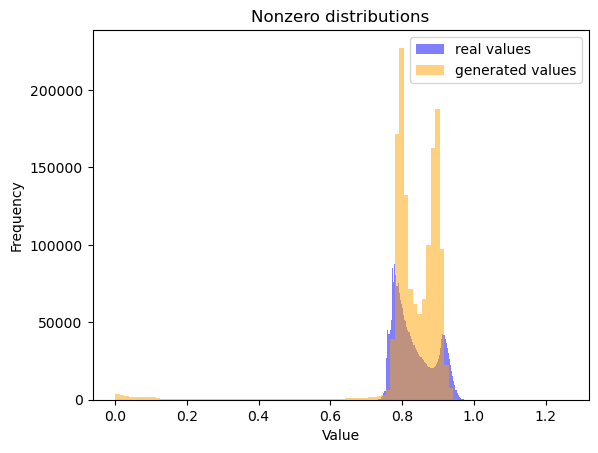

Nonzero distribution:
KS Statistic: 0.14642977466795037
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0014:
The distributions are significantly different (reject H0), KS statistic 0.1464 > 0.0014


In [24]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt1/generated_images_full_data.pt"
attempt1_data = torch.load(generated_data_path, map_location = "cpu")


## original dataset not normalized, relu activation
generated_data, consistant, inconsistant = analyze_data(generated_data_path, comparing_data_path)



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 147693
perc of occurences where mass is not preserved = 29.20% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 56413
perc of occurences where mass is not preserved = 11.15% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 10511
perc of occurences where mass is not preserved = 2.08% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 2692
perc of occurences where mass is not preserved = 0.53% vs. 0.32% in training data







DISTANCE:
total distance progentors = 176199 
number of occurences where distance increase (not preserved) = 91371
perc of occurences where mass increase (not preserved) = 51.86% vs. 49.67% in training data


total branches where the last halo distance to mai

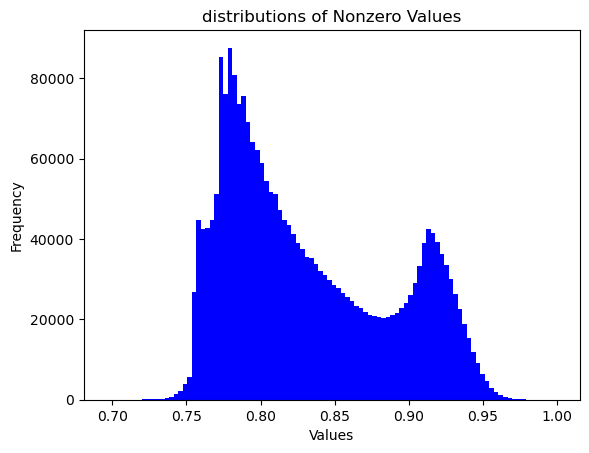

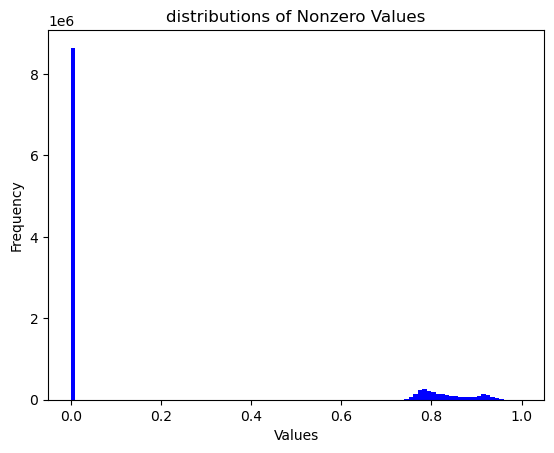

number of nonzero values = 2475374
Generated images:


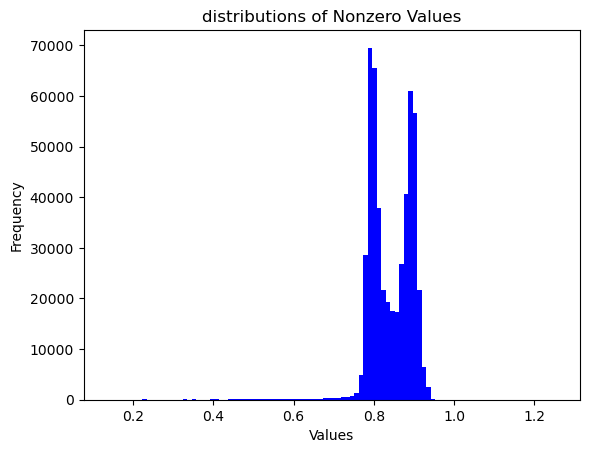

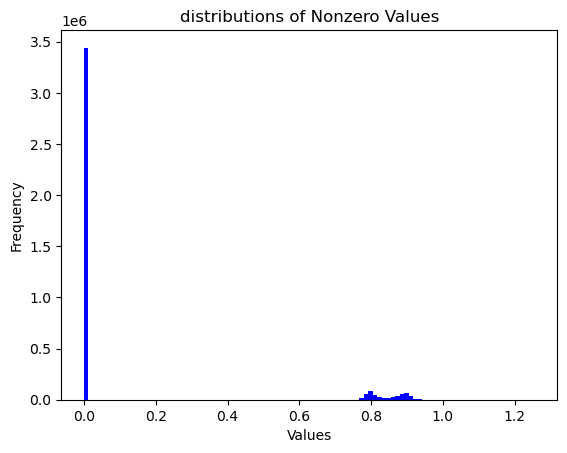

number of nonzero values = 505828


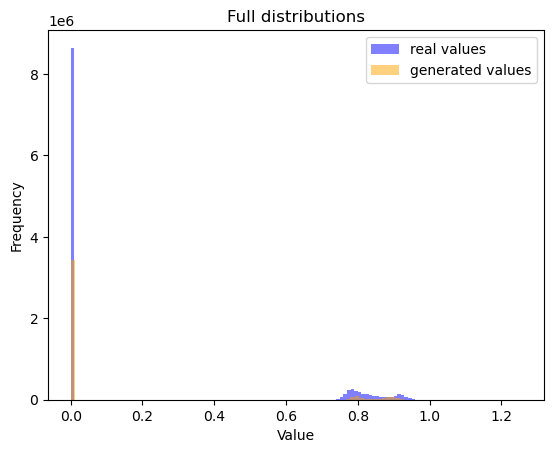

Full distribution:
KS Statistic: 0.09579142031504517
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0008:
The distributions are significantly different (reject H0), KS statistic 0.0958 > 0.0008


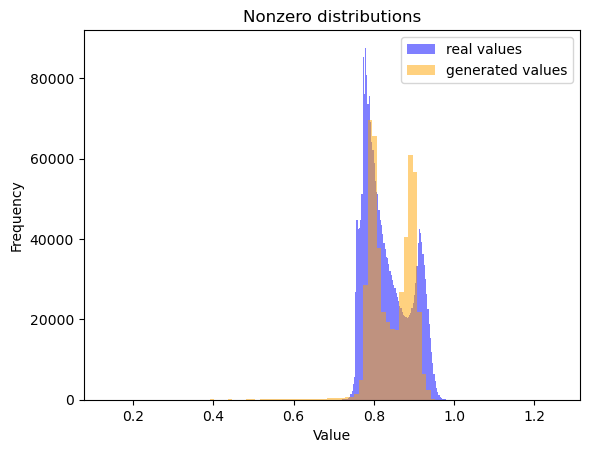

Nonzero distribution:
KS Statistic: 0.1706097120174443
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0021:
The distributions are significantly different (reject H0), KS statistic 0.1706 > 0.0021


(0.09579142031504517, 0.1706097120174443)

In [25]:
variable_consistancy_check(consistant, False)
avg_branch = check_branch_length(consistant)
og = torch.load("data/dataset_distlognorm_massnorm.pt")
ks_test(og, consistant, dim = 1)

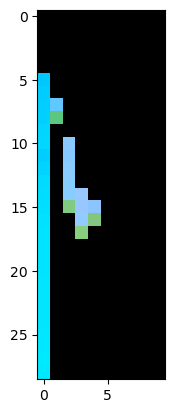

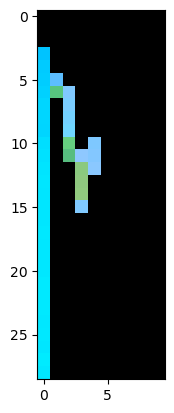

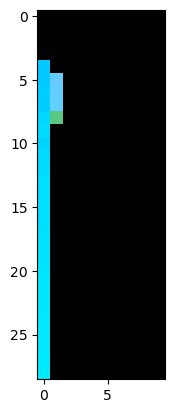

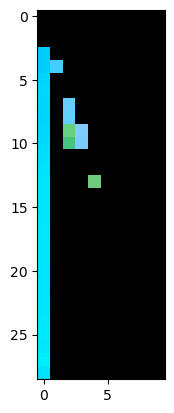

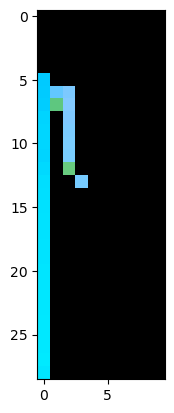

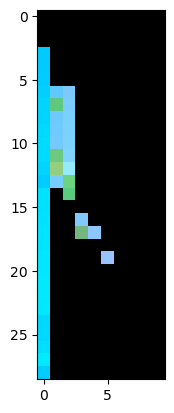

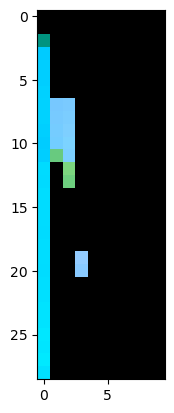

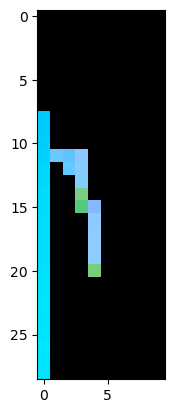

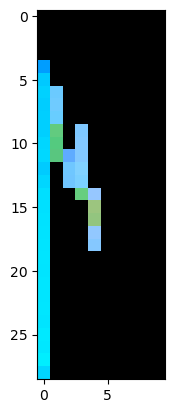

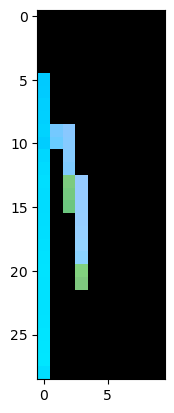

In [4]:
i = random.randint(1, 30000)
for j in range(10):
    plt.imshow(consistant[i+j].permute(1, 2, 0))
    plt.show()

# fox attempt 2: normalized data, sigmoid function

image 2652:


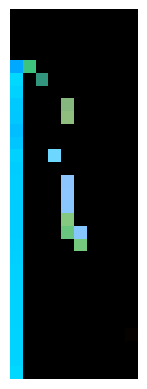

image 35938:


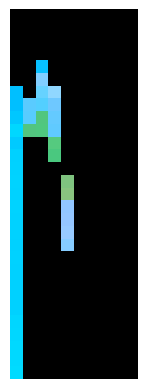

image 18347:


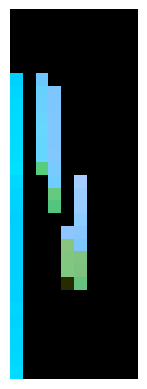

Consistency:


Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  100.00%
inconsistency due to gap between branches =  92.32%
inconsistency due to zgap in branch 99.93%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 38348, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 100.00% have distance main branch inconsistency
Of all images, 92.32% have gap between branches inconsistency
Of all images, 99.93% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 990723
perc of occurences where mass is not preserved = 42.36% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of o

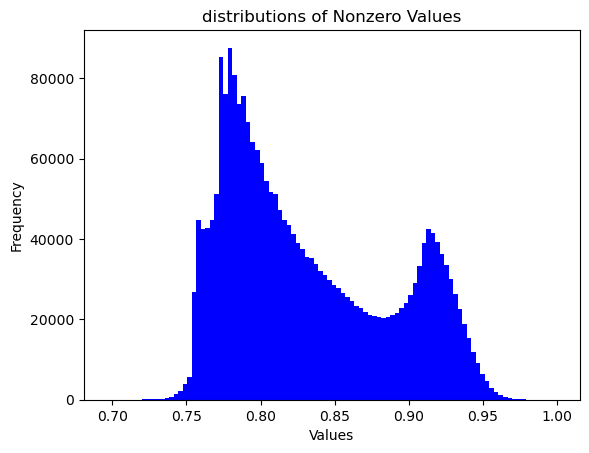

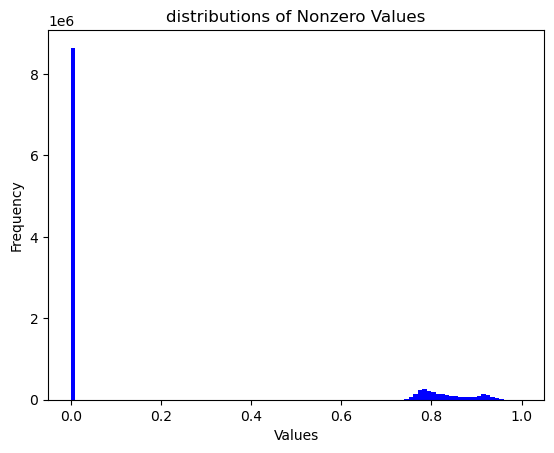

number of nonzero values = 2475374
Generated images:


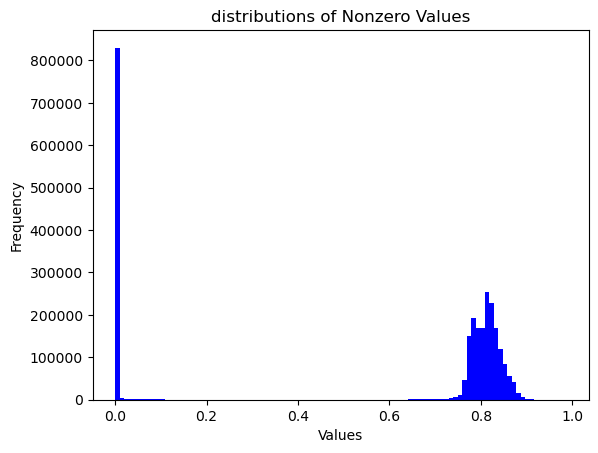

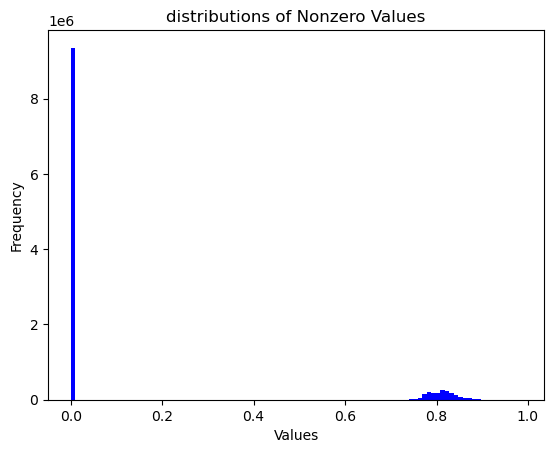

number of nonzero values = 2602230


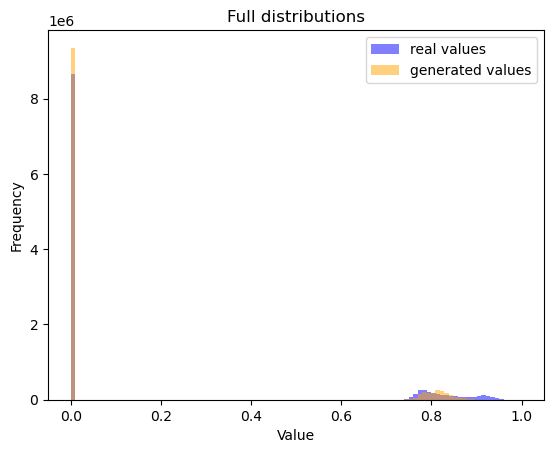

Full distribution:
KS Statistic: 0.06746528164935994
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0675 > 0.0006


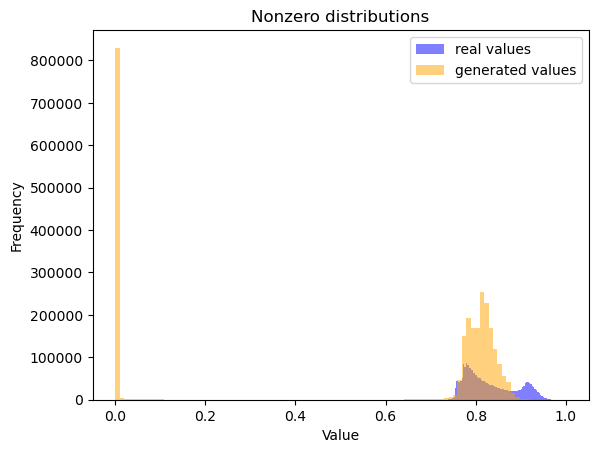

Nonzero distribution:
KS Statistic: 0.336995942102734
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are significantly different (reject H0), KS statistic 0.3370 > 0.0012


In [2]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt2/generated_images_norm_data_sigmoid.pt"
attempt2_data = torch.load(generated_data_path, map_location = "cpu")


## original dataset not normalized, relu activation
generated_data, consistant, inconsistant = analyze_data(generated_data_path, comparing_data_path)


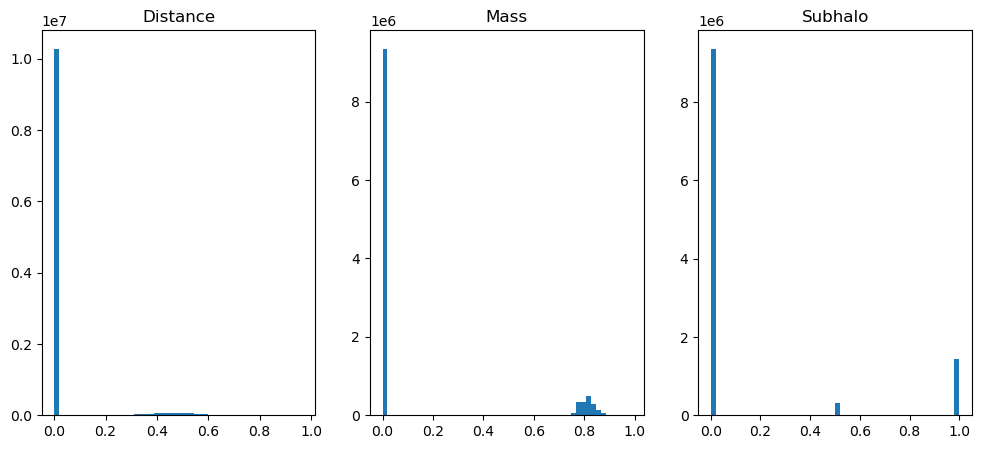

In [3]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt2/generated_images_norm_data_sigmoid.pt"
attempt2_data = torch.load(generated_data_path, map_location = "cpu")



dist = attempt2_data[:, 0]
mass = attempt2_data[:, 1]
subh = attempt2_data[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [20]:
# dist
print("dist:")
lower_threshold = 0.05
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.05
upper_threshold = 0.45
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.000001
upper_threshold = 0.49999
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.500001
upper_threshold = 0.99999
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.05 and 0.25: 0.17%

mass:
Percentage of values between 0.05 and 0.45: 0.13%

subh:
Percentage of values between 1e-06 and 0.49999: 0.00%

Percentage of values between 0.500001 and 0.99999: 0.00%



In [23]:
attempt2_data = transform_diffusion_image(attempt2_data, d_thresh = 0.22, m_tresh = 0.4, s_low = 0.4, s_high = 0.77)

attempt2_data_con, attempt2_data_incon = check_consistency(attempt2_data)



Percentage of consistant images = 51.28%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 6.59%
inconsistency due to distance not zero in main branch =  0.13%
inconsistency due to gap between branches =  71.24%
inconsistency due to zgap in branch 41.61%
inconsistency due to last descendant dont exist 0.59%

Number of images with two or more inconsistencies = 3482, which is  18.64%
That corresponds to 9.08% of all images


Of all images, 3.21% have zero inconsistency
Of all images, 0.07% have distance main branch inconsistency
Of all images, 34.71% have gap between branches inconsistency
Of all images, 20.27% have gap within branch inconsistency
Of all images, 0.29% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 347662
perc of occurences where mass is not preserved = 38.83% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 142402
perc of occurences where mass is not preserved = 15.90% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 16285
perc of occurences where mass is not preserved = 1.82% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 2280
perc of occurences where mass is not preserved = 0.25% vs. 0.32% in training data







DISTANCE:
total distance progentors = 419554 
number of occurences where distance increase (not preserved) = 242555
perc of occurences where mass increase (not preserved) = 57.81% vs. 49.67% in training data


total branches where the last halo distance to m

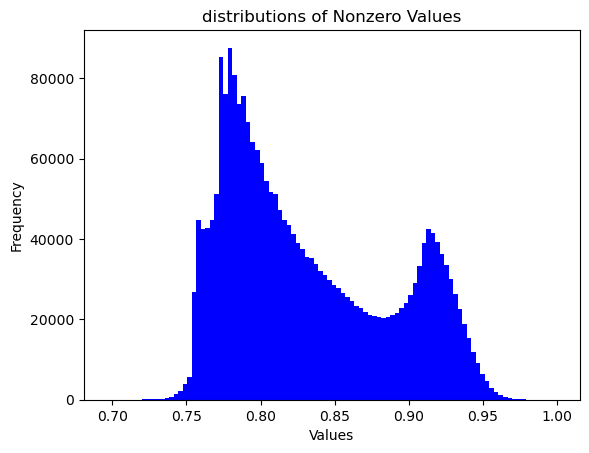

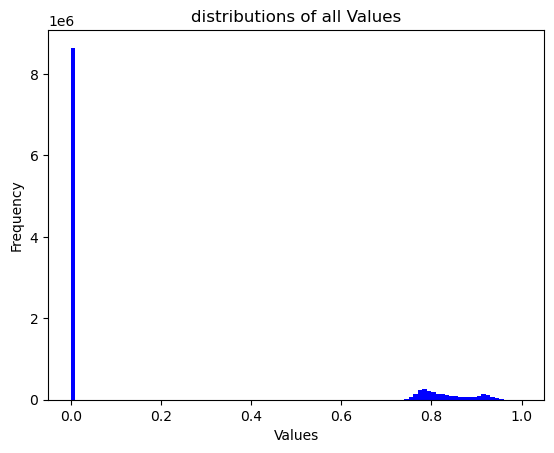

number of nonzero values = 2475374
Generated images:


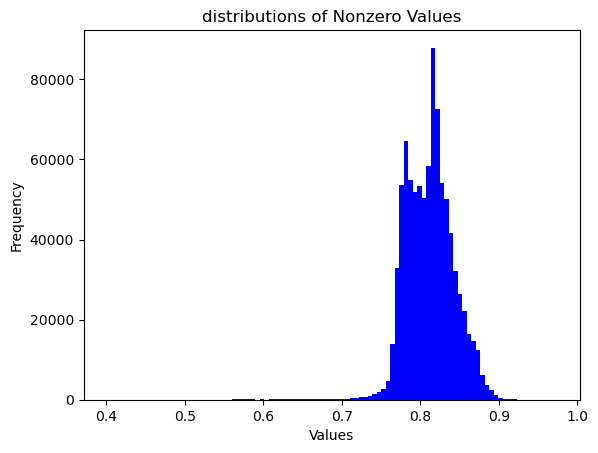

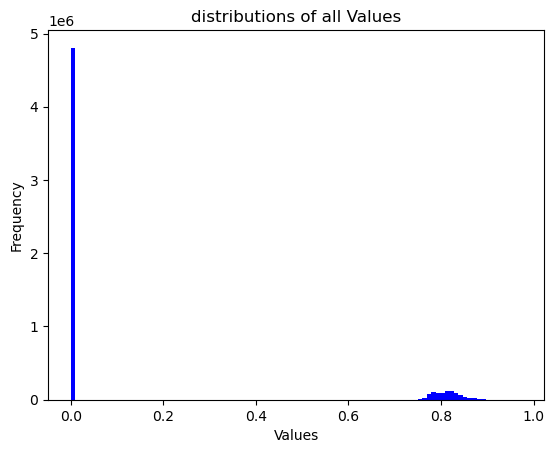

number of nonzero values = 895823


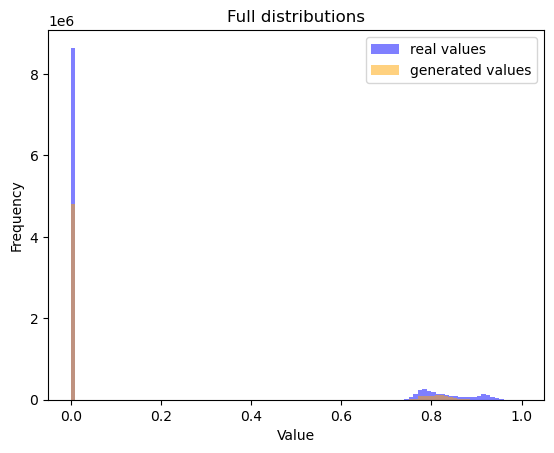

Full distribution:
KS Statistic: 0.06671157029838459
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0007:
The distributions are significantly different (reject H0), KS statistic 0.0667 > 0.0007


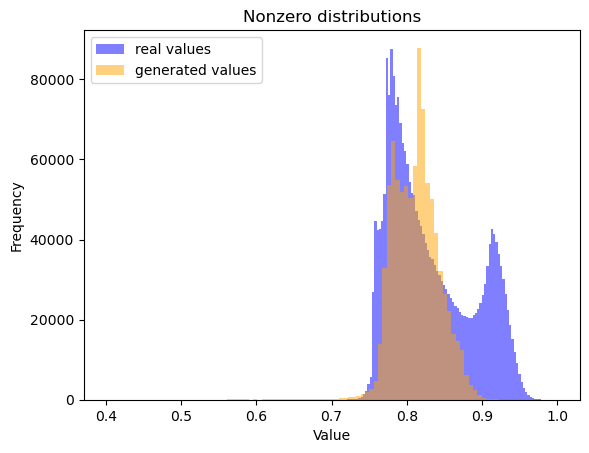

Nonzero distribution:
KS Statistic: 0.2456269430289335
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0017:
The distributions are significantly different (reject H0), KS statistic 0.2456 > 0.0017


(0.06671157029838459, 0.2456269430289335)

In [25]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
original = torch.load(comparing_data_path)

variable_consistancy_check(attempt2_data_con, False)
avg_branch = check_branch_length(attempt2_data_con)
ks_test(original, attempt2_data_con, dim = 1)

Real images:


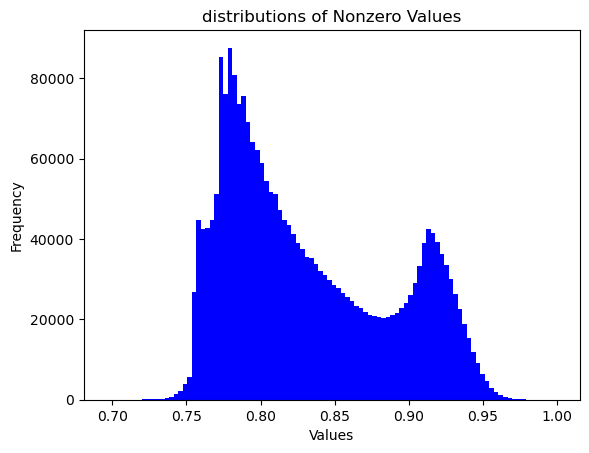

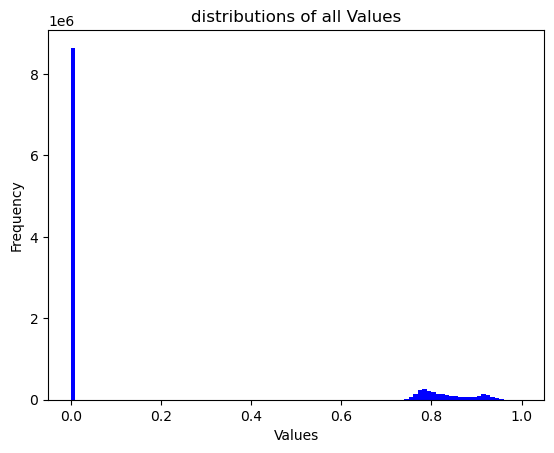

number of nonzero values = 2475374
Generated images:


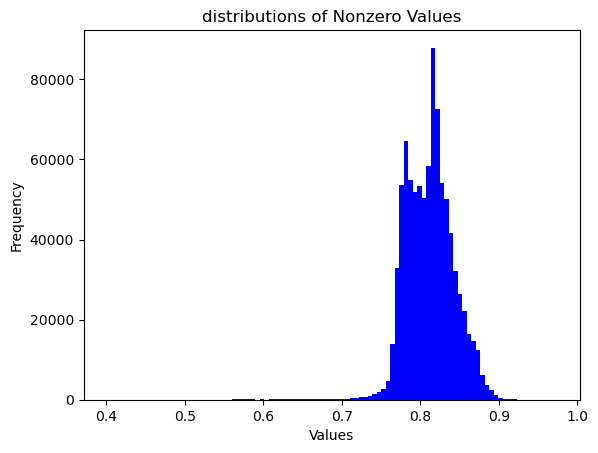

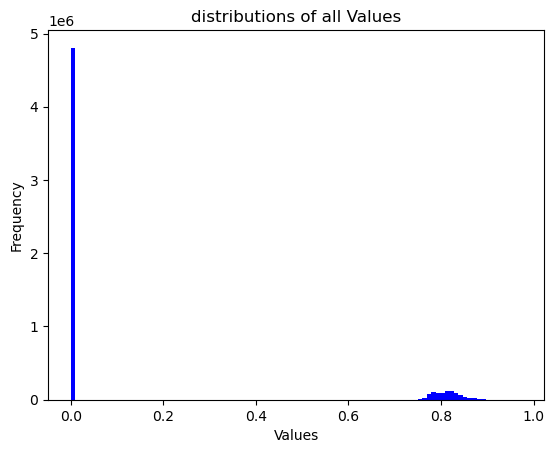

number of nonzero values = 895823


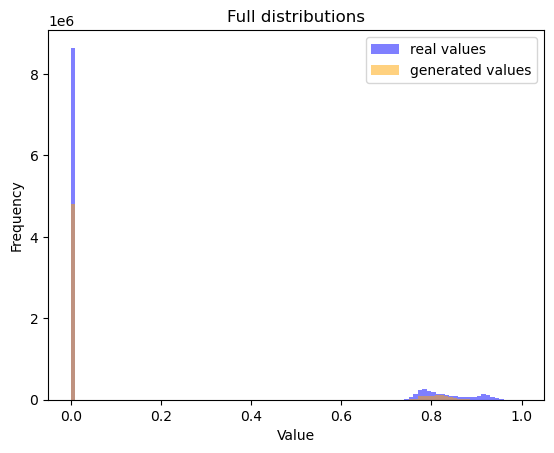

Full distribution:
KS Statistic: 0.06671157029838459
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0007:
The distributions are significantly different (reject H0), KS statistic 0.0667 > 0.0007


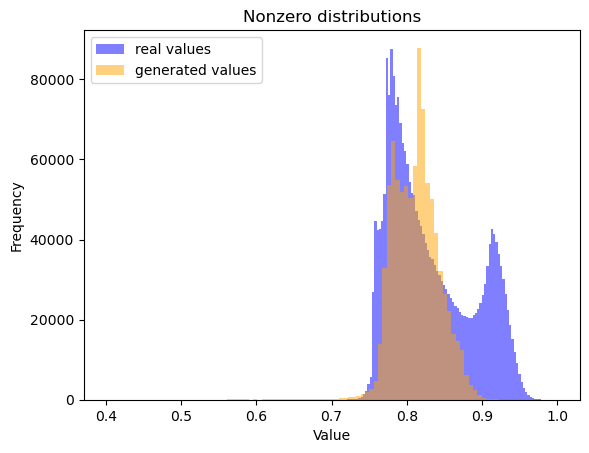

Nonzero distribution:
KS Statistic: 0.2456269430289335
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0017:
The distributions are significantly different (reject H0), KS statistic 0.2456 > 0.0017


(0.06671157029838459, 0.2456269430289335)

In [27]:
generated_data_path = "models/fox_attempt2/generated_images_norm_data_sigmoid.pt"
attempt2_data = torch.load(generated_data_path, map_location = "cpu")
threshold = 0.2

# Set values below the threshold to 0
attempt2_data[attempt2_data < threshold] = 0

ks_test(original, attempt2_data_con, dim = 1)

# fox attempt 3: original data, relu function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 14272:


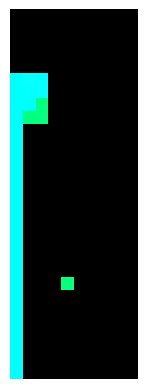

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 11367:


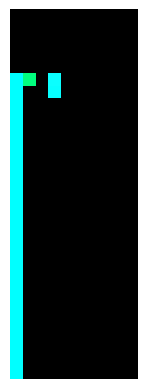

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image 11686:


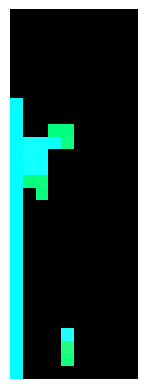

Consistency:


Percentage of consistant images = 35.83% vs. 97.51% in training data

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 17.82%
inconsistency due to distance not zero in main branch =  2.71%
inconsistency due to gap between branches =  75.20%
inconsistency due to zgap in branch 41.02%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 7789, which is  31.65%
That corresponds to 20.31% of all images


Of all images, 11.43% have zero inconsistency
Of all images, 1.74% have distance main branch inconsistency
Of all images, 48.26% have gap between branches inconsistency
Of all images, 26.32% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 478570
perc of occurences where mass is not preserved = 39.05% vs. 25.77% in training data




monotonicity threshold = -0.0

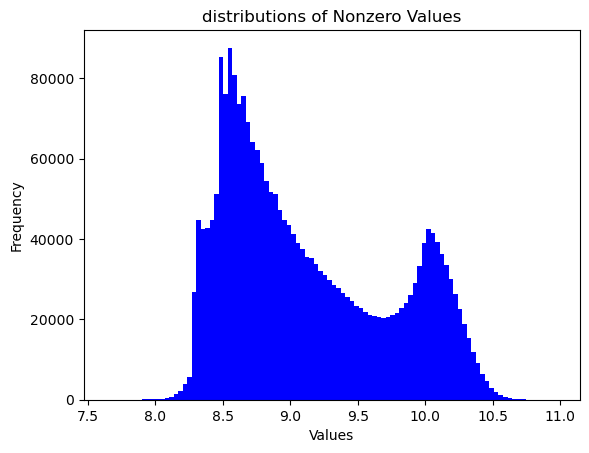

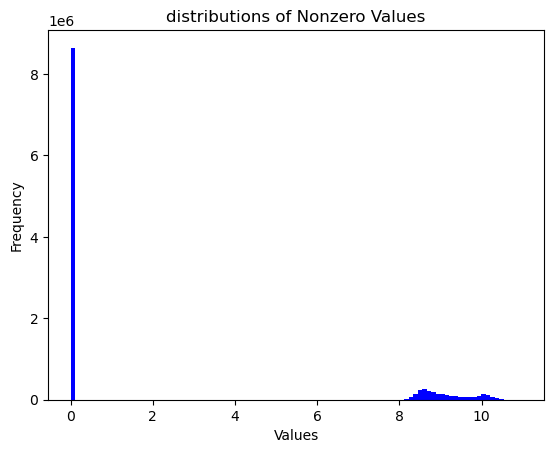

number of nonzero values = 2475374
Generated images:


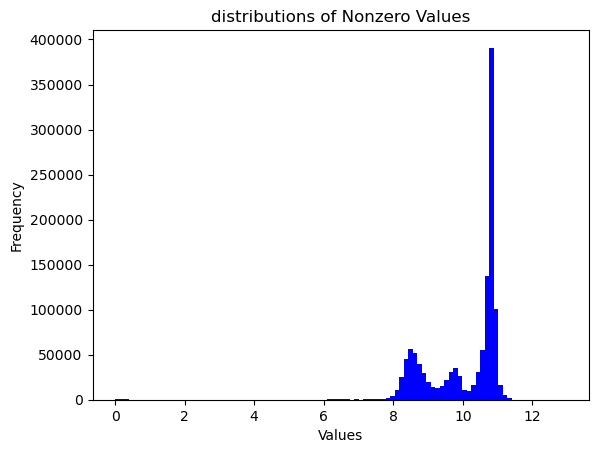

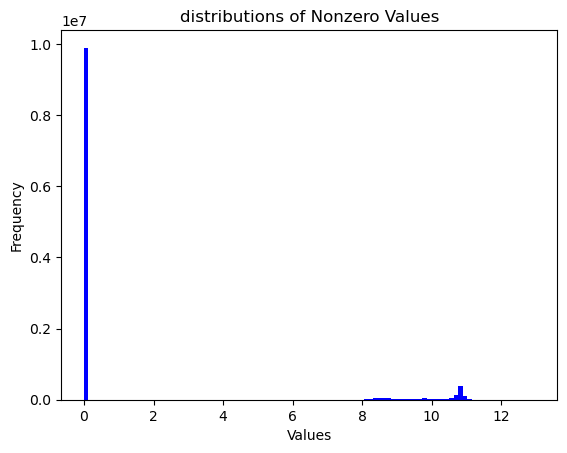

number of nonzero values = 1227232


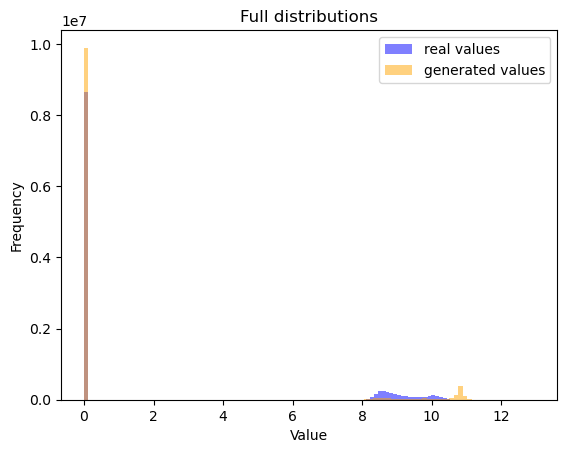

Full distribution:
KS Statistic: 0.11515630001834376
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.1152 > 0.0006


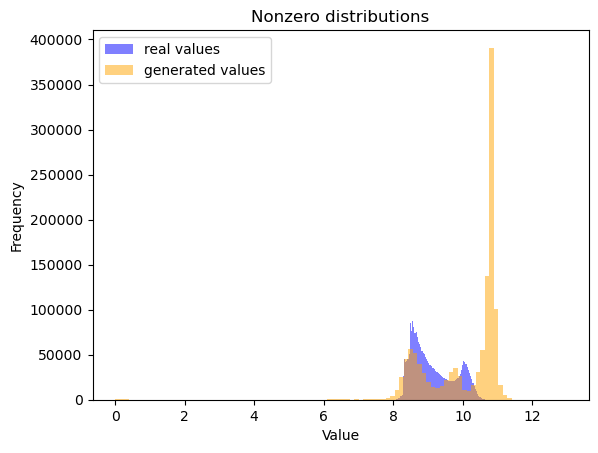

Nonzero distribution:
KS Statistic: 0.5903944900861038
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0015:
The distributions are significantly different (reject H0), KS statistic 0.5904 > 0.0015


In [6]:
comparing_data_path = "data/dataset.pt"
generated_data_path = "models/fox_attempt3/generated_images_original_data_relu.pt"
attempt3_data = torch.load(generated_data_path, map_location = "cpu")


## original dataset not normalized, relu activation
generated_data, consistant_OG_relu, inconsistant = analyze_data(generated_data_path, comparing_data_path)


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 166933
perc of occurences where mass is not preserved = 39.35% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 46788
perc of occurences where mass is not preserved = 11.03% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 8130
perc of occurences where mass is not preserved = 1.92% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1374
perc of occurences where mass is not preserved = 0.32% vs. 0.32% in training data







DISTANCE:
total distance progentors = 82066 
number of occurences where distance increase (not preserved) = 37556
perc of occurences where mass increase (not preserved) = 45.76% vs. 49.67% in training data


total branches where the last halo distance to main 

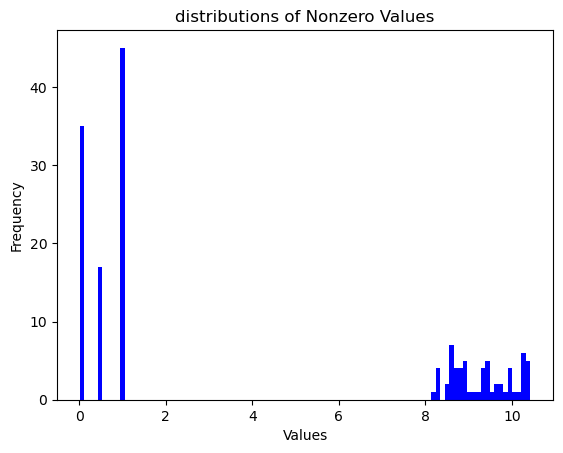

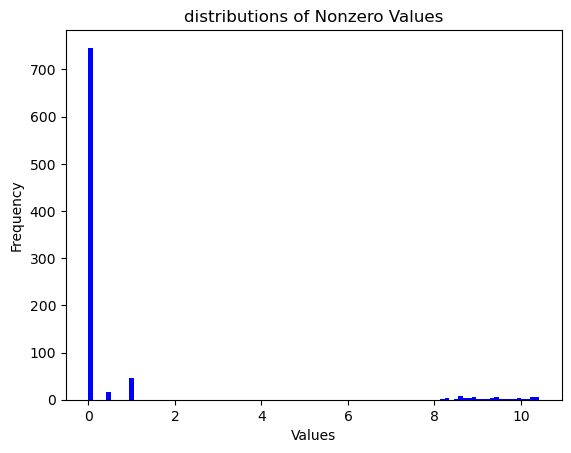

number of nonzero values = 159
Generated images:


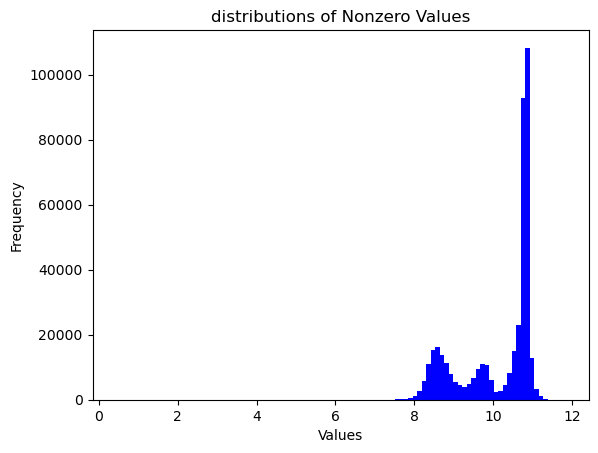

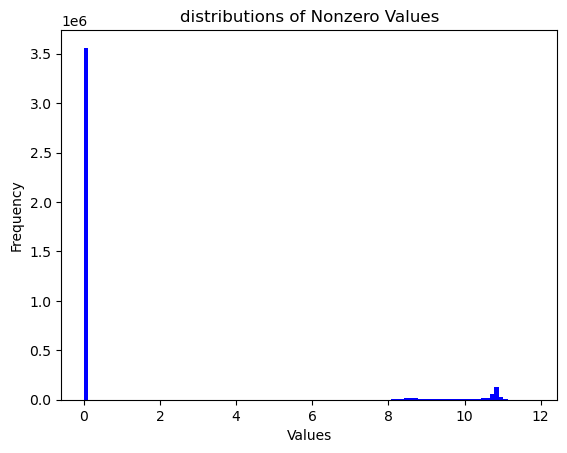

number of nonzero values = 424190


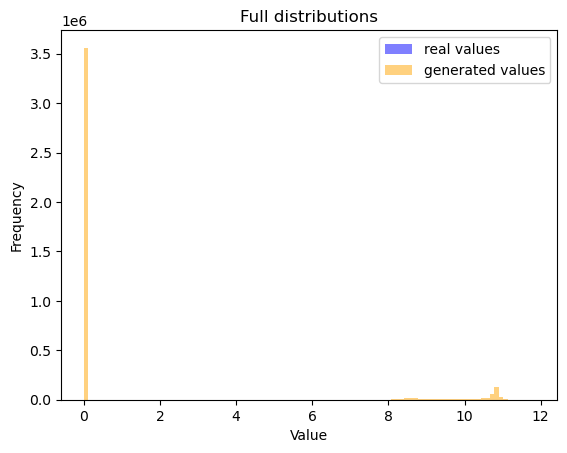

Full distribution:
KS Statistic: 0.07630125985042413
P-value: 7.496917719862233e-05

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0460:
The distributions are significantly different (reject H0), KS statistic 0.0763 > 0.0460


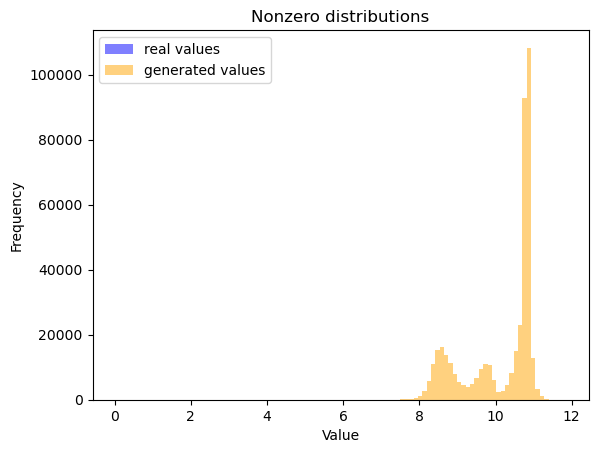

Nonzero distribution:
KS Statistic: 0.6153987599896273
P-value: 1.8096694972174183e-58

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.1077:
The distributions are significantly different (reject H0), KS statistic 0.6154 > 0.1077


(0.07630125985042413, 0.6153987599896273)

In [8]:
variable_consistancy_check(consistant_OG_relu, False)
avg_branch = check_branch_length(consistant_OG_relu)
og = torch.load("data/dataset.pt")
og = og.permute(1, 0, 2, 3)
ks_test(og, consistant_OG_relu, dim = 1)

## original dataset not normalized, relu activation get 40% consistant images

# fox attempt 4: original data, sigmoid function
doesnt make sense since sigmoid can only generate between 0 - 1


Plot images:
image 18846:


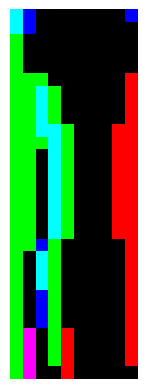

image 4603:


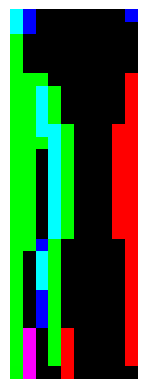

image 2365:


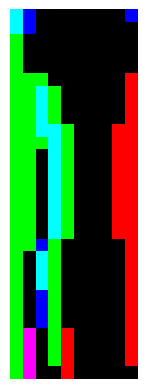

image 22564:


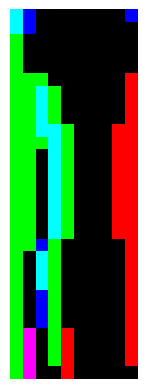

image 37614:


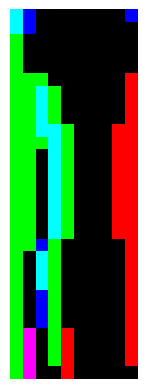

image 547:


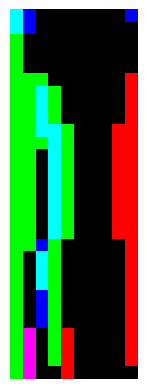

image 19592:


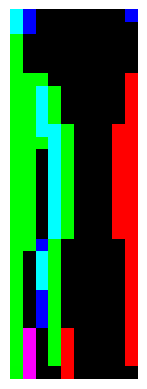

image 37491:


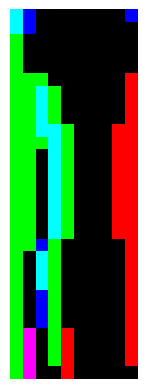

image 30885:


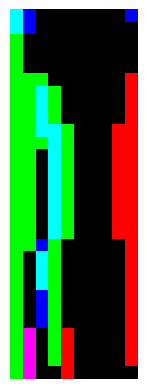

image 32871:


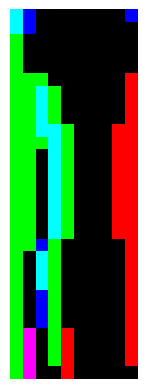


Check structural consistency:


Percentage of consistant images = 0.0%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 100.00%
inconsistency due to distance not zero in main branch =  100.00%
inconsistency due to gap between branches =  100.00%
inconsistency due to zgap in branch 100.00%
inconsistency due to last descendant dont exist 100.00%

Number of images with two or more inconsistencies = 38348, which is  100.00%
That corresponds to 100.00% of all images


Of all images, 100.00% have zero inconsistency
Of all images, 100.00% have distance main branch inconsistency
Of all images, 100.00% have gap between branches inconsistency
Of all images, 100.00% have gap within branch inconsistency
Of all images, 100.00% have last descendant inconsistency

Check variable consistency
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 335555
perc of occurences where mass is not preserved = 8.54% vs. 25.77% in training data






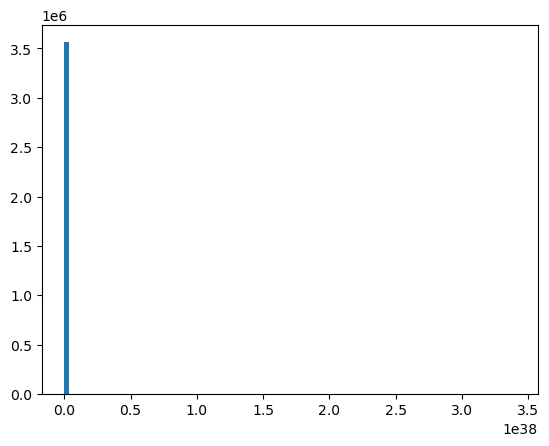

min mass change = -1.0000 vs. -0.2242 in training data
max mass change = 340279770772509196049560342183603601408.0000 vs. 0.2861 in training data
average mass change = inf vs. 0.0029 in training data




DISTANCE:
total distance progentors = 2409981 
number of occurences where distance increase (not preserved) = 460352
perc of occurences where mass increase (not preserved) = 19.10% vs. 49.67% in training data


total branches where the last halo distance to main branche is not the lowest in the branch is =  157624
percentage of all branches where the last halo distance to main branch is not the lowest in the branch is = 45.67% vs. 17.88% in training data


jumps greater than 20.0% (negative or positive) = 31.73% of all jumps vs. 4.76% in training data


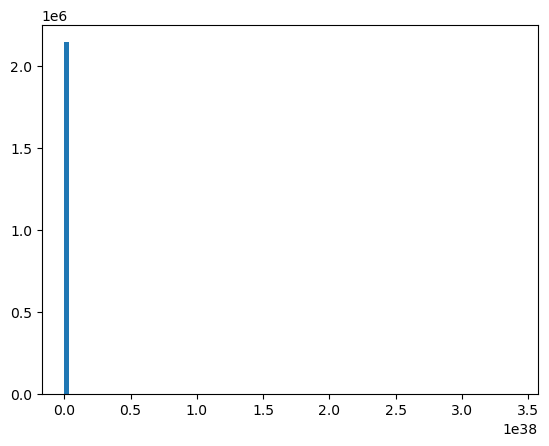

min jump = -1.0000 vs. -0.8070 in training data
max jump = 340217483492616381769688400174904246272.0000 vs. 5.0933 in training data
average jump = inf vs. -0.0260 in training data

Check number of branches of all generated images:
number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 0
number of images with 6 branches is: 0
number of images with 7 branches is: 0
number of images with 8 branches is: 0
number of images with 9 branches is: 12394
number of images with 10 branches is: 25954
double check that all images are counted: total images is 38348 = 38348
average number of branches in an image = 9.68 vs. 7.12 in training data
Average branch length = 8.58 vs. 7.54 in training data
Average nonzero entries (progenitors) in an image channel = 83.00 vs. 53.72 in training data

Mass KS test against training data:
Real images:


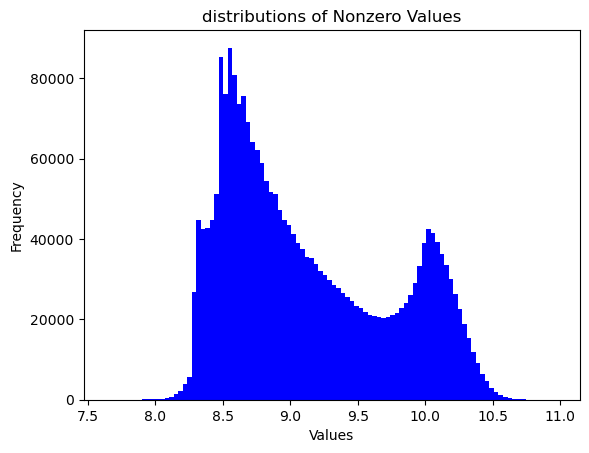

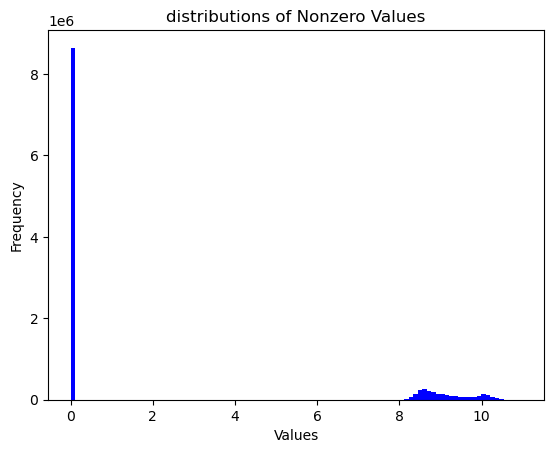

number of nonzero values = 2475374
Generated images:


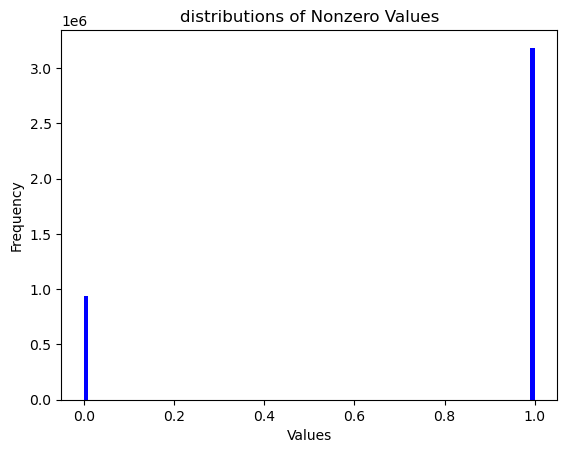

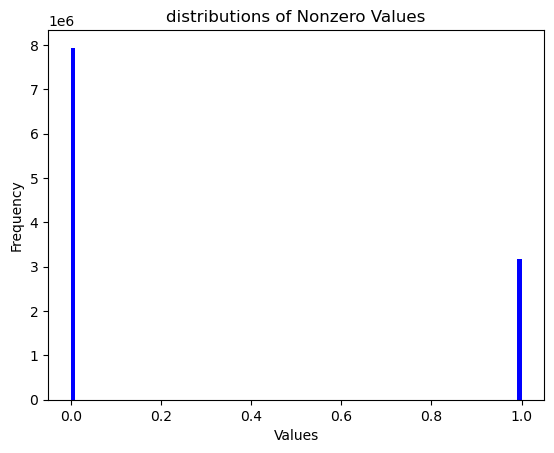

number of nonzero values = 4120359


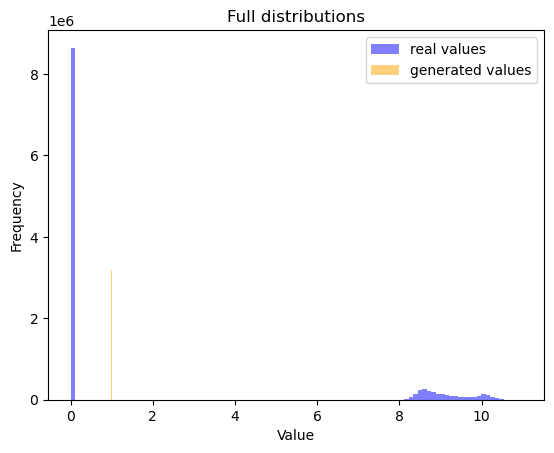

Full distribution:
KS Statistic: 0.22258716005510337
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.2226 > 0.0006


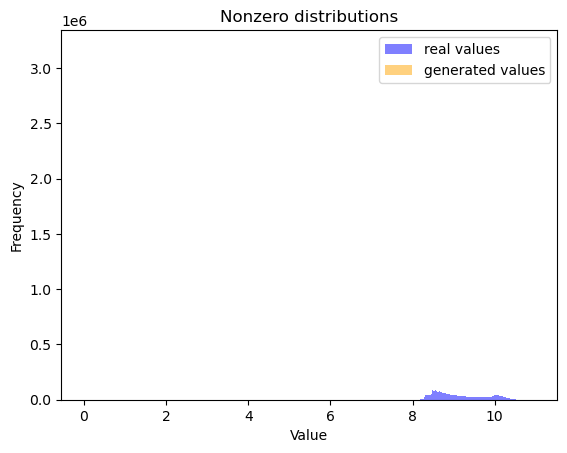

Nonzero distribution:
KS Statistic: 1.0
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0011:
The distributions are significantly different (reject H0), KS statistic 1.0000 > 0.0011


In [5]:
comparing_data_path = "data/dataset.pt"
generated_data_path = "models/fox_attempt4/generated_images_original_data_sigmoid.pt"
attempt4_data = torch.load(generated_data_path, map_location = "cpu")


## original dataset not normalized, relu activation
generated_data, consistant, inconsistant = analyze_data(generated_data_path, comparing_data_path)


# fox attempt 5: norm data, relu function

image 34244:


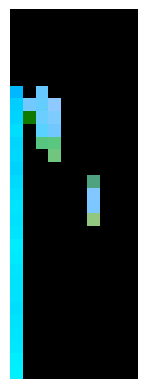

image 1410:


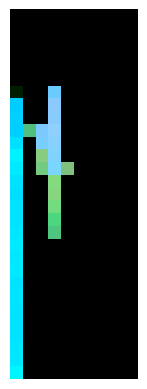

image 19963:


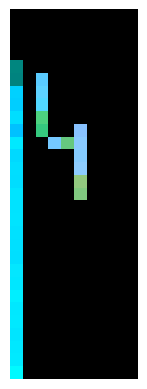

Consistency:


Percentage of consistant images = 28.12% vs. 97.51% in training data

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 69.21%
inconsistency due to distance not zero in main branch =  8.92%
inconsistency due to gap between branches =  56.74%
inconsistency due to zgap in branch 39.33%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 15580, which is  56.52%
That corresponds to 40.63% of all images


Of all images, 49.74% have zero inconsistency
Of all images, 6.41% have distance main branch inconsistency
Of all images, 40.78% have gap between branches inconsistency
Of all images, 28.27% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency



MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 684696
perc of occurences where mass is not preserved = 38.96% vs. 25.77% in training data




monotonicity threshold = -0.

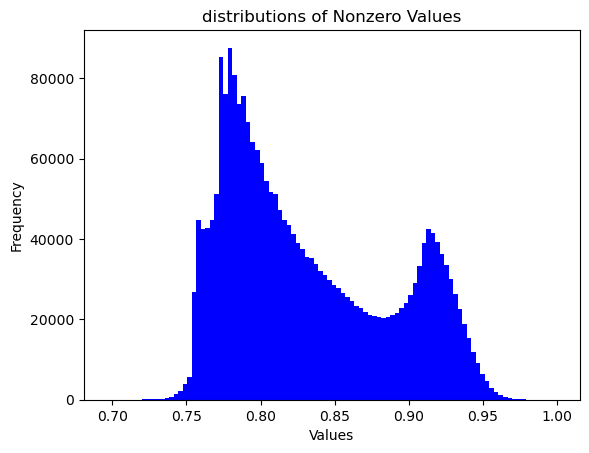

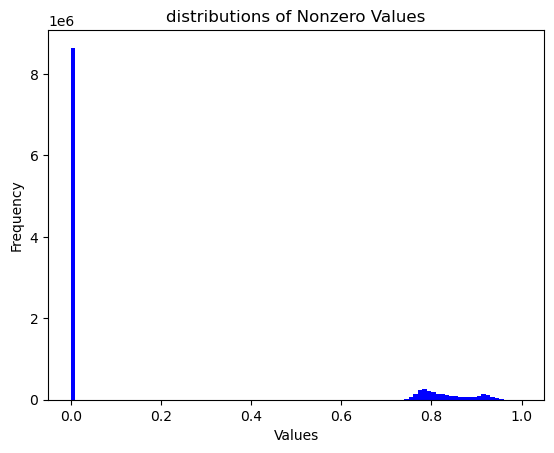

number of nonzero values = 2475374
Generated images:


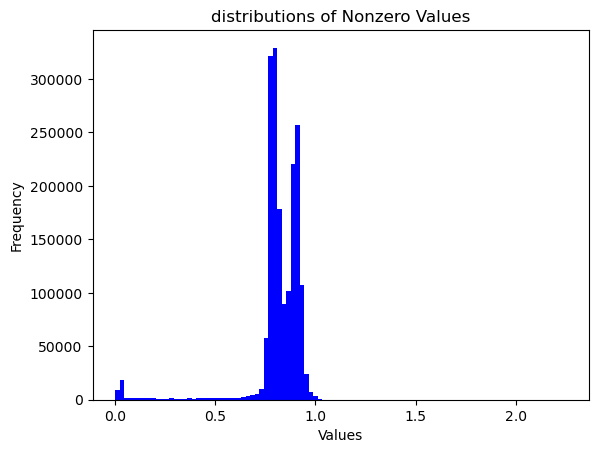

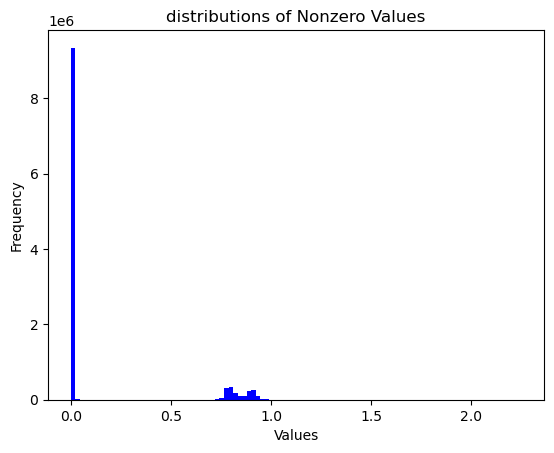

number of nonzero values = 1784826


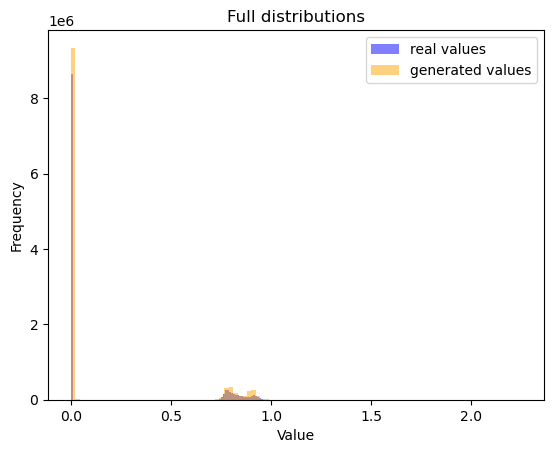

Full distribution:
KS Statistic: 0.06973415868471322
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0006:
The distributions are significantly different (reject H0), KS statistic 0.0697 > 0.0006


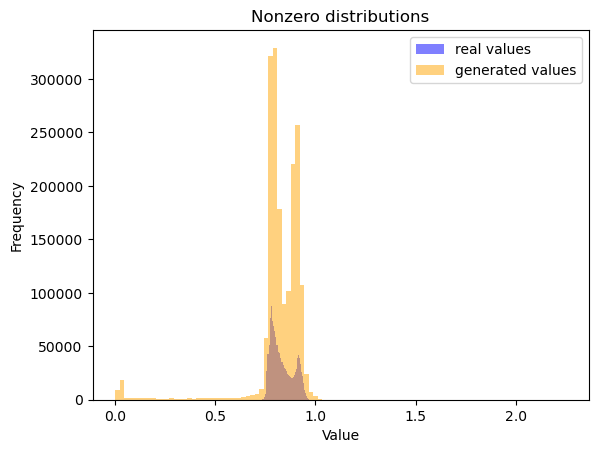

Nonzero distribution:
KS Statistic: 0.09648001113220617
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0013:
The distributions are significantly different (reject H0), KS statistic 0.0965 > 0.0013


In [9]:
comparing_data_path = "data/dataset_distlognorm_massnorm.pt"
generated_data_path = "models/fox_attempt5/generated_images_norm_data_relu.pt"
attempt5_data = torch.load(generated_data_path, map_location = "cpu")


## original dataset not normalized, relu activation
generated_data, consistant_norm_relu, inconsistant = analyze_data(generated_data_path, comparing_data_path)


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 184717
perc of occurences where mass is not preserved = 38.43% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 112698
perc of occurences where mass is not preserved = 23.45% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 16878
perc of occurences where mass is not preserved = 3.51% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 4717
perc of occurences where mass is not preserved = 0.98% vs. 0.32% in training data







DISTANCE:
total distance progentors = 224004 
number of occurences where distance increase (not preserved) = 103895
perc of occurences where mass increase (not preserved) = 46.38% vs. 49.67% in training data


total branches where the last halo distance to m

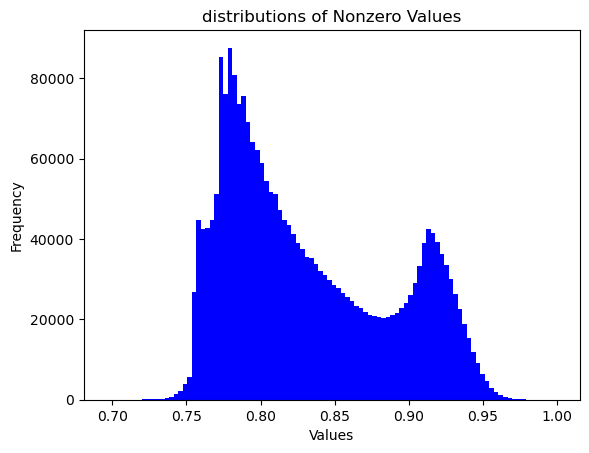

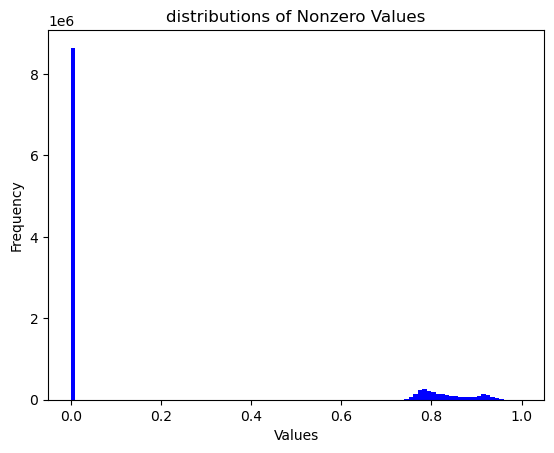

number of nonzero values = 2475374
Generated images:


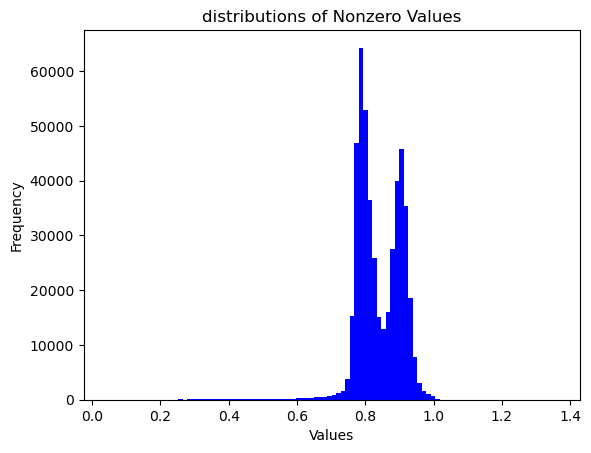

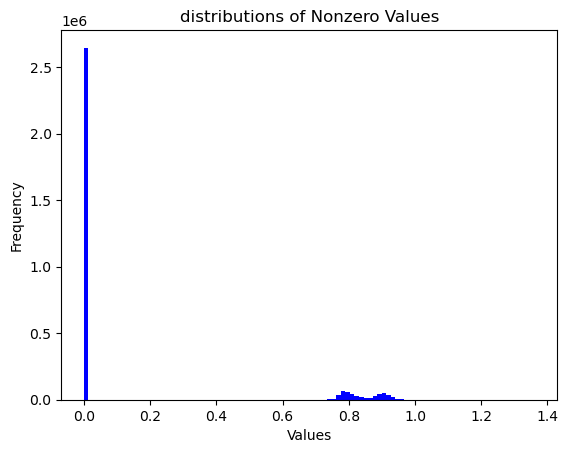

number of nonzero values = 480681


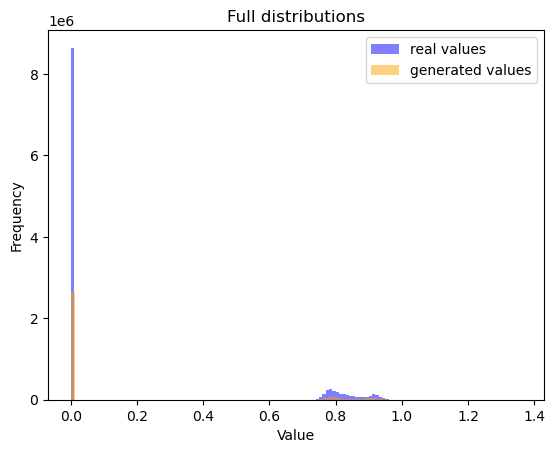

Full distribution:
KS Statistic: 0.07193373454009755
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0719 > 0.0009


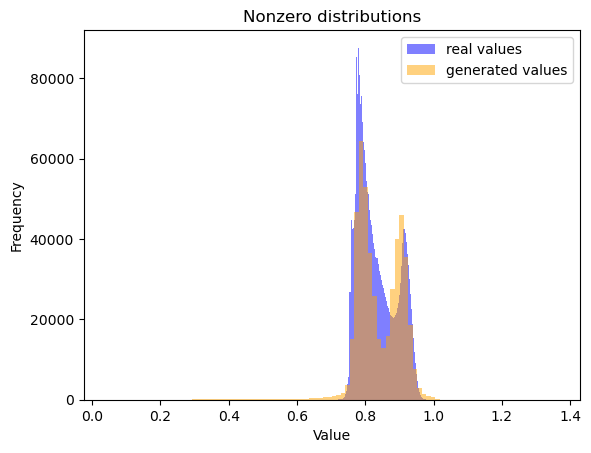

Nonzero distribution:
KS Statistic: 0.1117455256779657
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0021:
The distributions are significantly different (reject H0), KS statistic 0.1117 > 0.0021


(0.07193373454009755, 0.1117455256779657)

In [10]:
variable_consistancy_check(consistant_norm_relu, False)
avg_branch = check_branch_length(consistant_norm_relu)
og = torch.load("data/dataset_distlognorm_massnorm.pt")
ks_test(og, consistant_norm_relu, dim = 1)

# notes:
- sigmoid function creates 0.0% consistent merger trees, but manage to create merger trees with more branches (more complex merger trees)
- relu activation creates consistent merger trees, but low complexity and few branches, less nonzero values --> more sparse generations
- original data and sigmoid doesnt make sense to compare since original data has values up to 10.9, but sigmoid gives values between 0 and 1
- normalized with digmoid have the lowest KS score, just lower than normalized with relu.
- original data with relu performs just better on consistency, but lower on KS

# improve results

# attempt 1

In [31]:
import torch
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data


generated_data_path = "models/fox_attempt1/generated_images_full_data.pt"
data = torch.load(generated_data_path, map_location = "cpu")

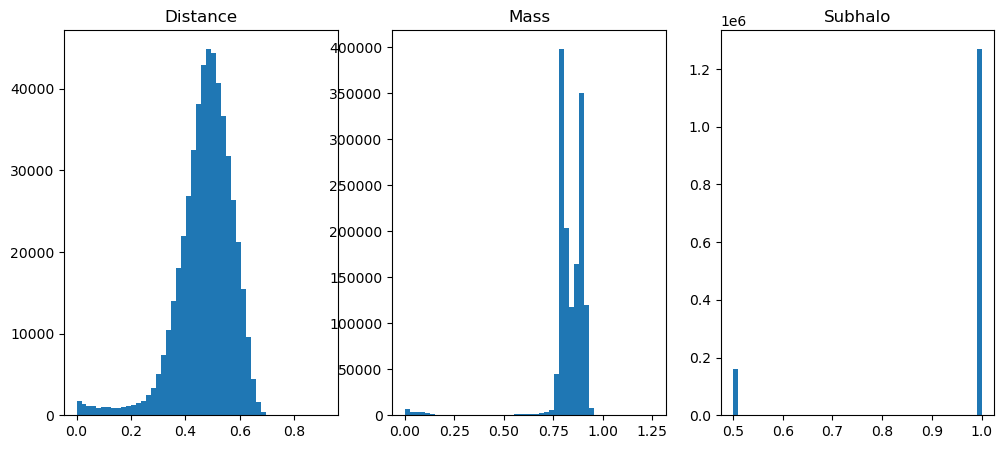

In [34]:
dist = data[:, 0]
mass = data[:, 1]
subh = data[:, 2]

nonzero_indices = torch.nonzero(dist.flatten())
dist = dist.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(mass.flatten())
mass = mass.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(subh.flatten())
subh = subh.flatten()[nonzero_indices[:, 0]]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [37]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.2
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.25
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

dist:
Percentage of values between 0.15 and 0.2: 0.55%

mass:
Percentage of values between 0.25 and 0.5: 0.30%



In [42]:
data_new = transform_diffusion_image(data, d_thresh = 0.2, m_tresh = 0.5, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = data_new[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

nearest_con, nearest_incon = check_consistency(data_new)
variable_consistancy_check(nearest_con, False)
avg_branch = check_branch_length(nearest_con)

mass:
Percentage of values below 0.6985: 0.09%



Percentage of consistant images = 42.62%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 14.16%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  80.25%
inconsistency due to zgap in branch 35.57%
inconsistency due to last descendant dont exist 0.85%

Number of images with two or more inconsistencies = 5723, which is  26.01%
That corresponds to 14.92% of all images


Of all images, 8.13% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 46.05% have gap between branches inconsistency
Of all images, 20.41% have gap within branch inconsistency
Of all images, 0.49% have last descendant inconsistency
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 177840
perc of occurences where mass is not preserved = 29.24% vs. 25.77% in training data




monotonicity threshold = -

Real images:


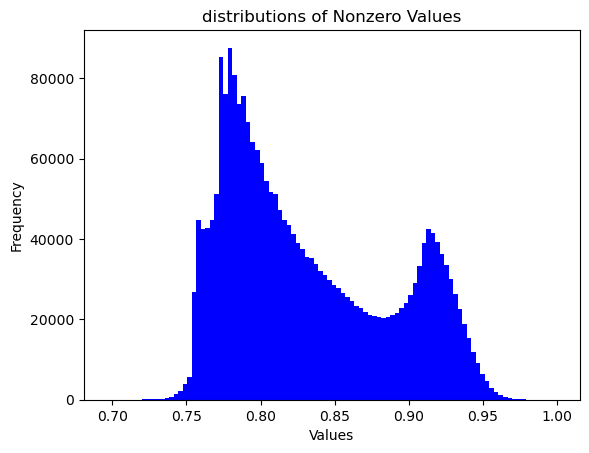

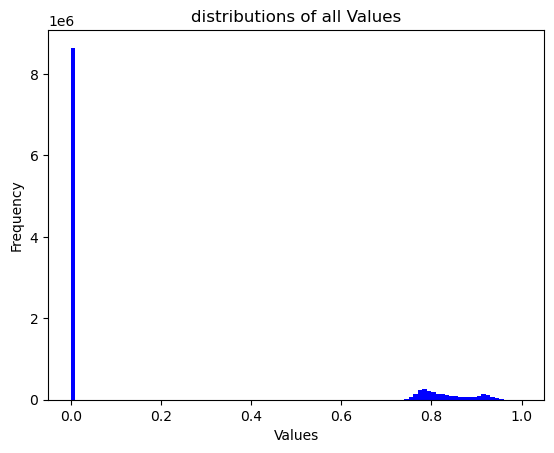

number of nonzero values = 2475374
Generated images:


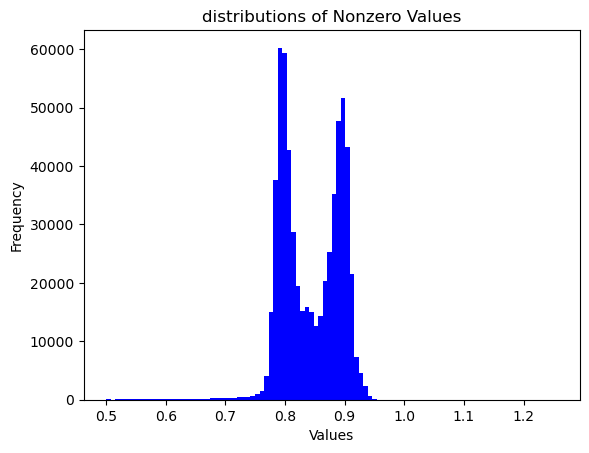

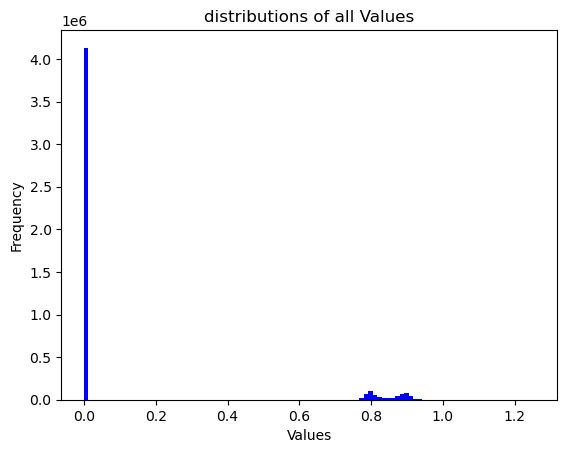

number of nonzero values = 608132


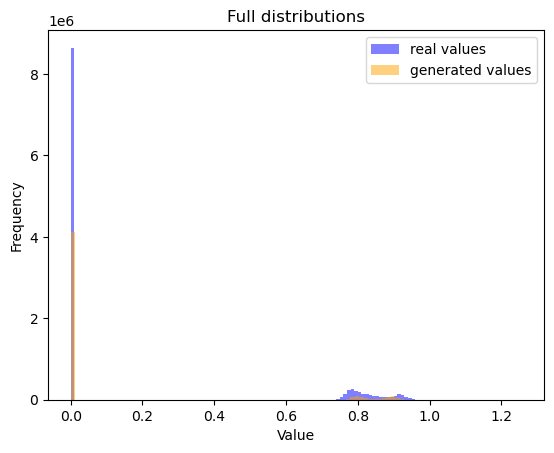

Full distribution:
KS Statistic: 0.09525658980033624
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0007:
The distributions are significantly different (reject H0), KS statistic 0.0953 > 0.0007


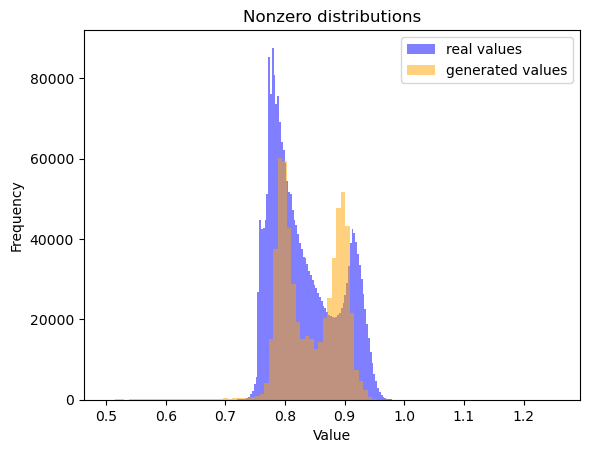

Nonzero distribution:
KS Statistic: 0.17187034998215198
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0019:
The distributions are significantly different (reject H0), KS statistic 0.1719 > 0.0019


(0.09525658980033624, 0.17187034998215198)

In [47]:
og = torch.load("data/dataset_distlognorm_massnorm.pt")
ks_test(og, nearest_con, dim = 1)

# attempt 2

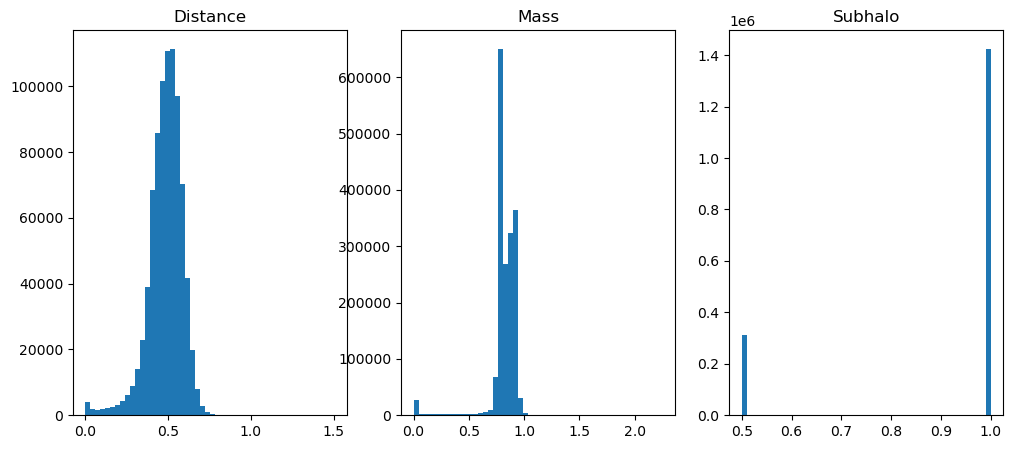

In [39]:
generated_data_path2 = generated_data_path = "models/fox_attempt5/generated_images_norm_data_relu.pt"
data2 = torch.load(generated_data_path2, map_location = "cpu")

dist = data2[:, 0]
mass = data2[:, 1]
subh = data2[:, 2]

nonzero_indices = torch.nonzero(dist.flatten())
dist = dist.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(mass.flatten())
mass = mass.flatten()[nonzero_indices[:, 0]]
              
nonzero_indices = torch.nonzero(subh.flatten())
subh = subh.flatten()[nonzero_indices[:, 0]]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [40]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.2
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.25
upper_threshold = 0.5
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

dist:
Percentage of values between 0.15 and 0.2: 0.56%

mass:
Percentage of values between 0.25 and 0.5: 0.72%



In [43]:
data_new2 = transform_diffusion_image(data2, d_thresh = 0.2, m_tresh = 0.5, s_low = 0.3, s_high = 0.77)

original_min = 0.6985
mass = data_new2[:, 1]
nonzero_indices = torch.nonzero(mass.flatten())
nonzero_mass = mass.flatten()[nonzero_indices[:, 0]]
print("mass:")
count_between_thresholds = torch.sum(nonzero_mass < original_min).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values below {original_min}: {percentage_between_thresholds:.2f}%\n")

nearest_con2, nearest_incon = check_consistency(data_new2)
variable_consistancy_check(nearest_con2, False)
avg_branch = check_branch_length(nearest_con2)

mass:
Percentage of values below 0.6985: 0.17%



Percentage of consistant images = 47.61%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 12.18%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  62.96%
inconsistency due to zgap in branch 48.62%
inconsistency due to last descendant dont exist 0.16%

Number of images with two or more inconsistencies = 4521, which is  22.50%
That corresponds to 11.79% of all images


Of all images, 6.38% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 32.98% have gap between branches inconsistency
Of all images, 25.47% have gap within branch inconsistency
Of all images, 0.09% have last descendant inconsistency
MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 321073
perc of occurences where mass is not preserved = 38.60% vs. 25.77% in training data




monotonicity threshold = -

Real images:


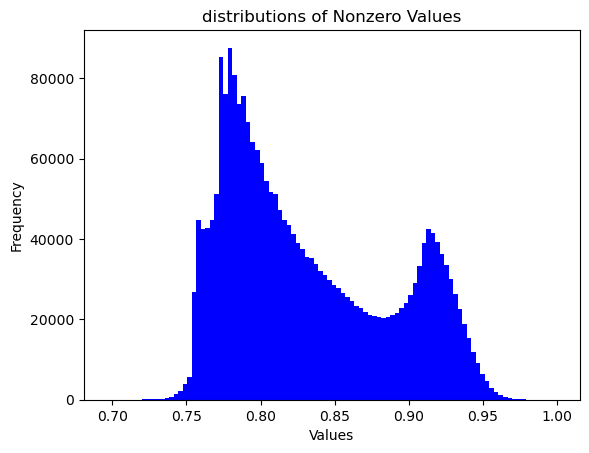

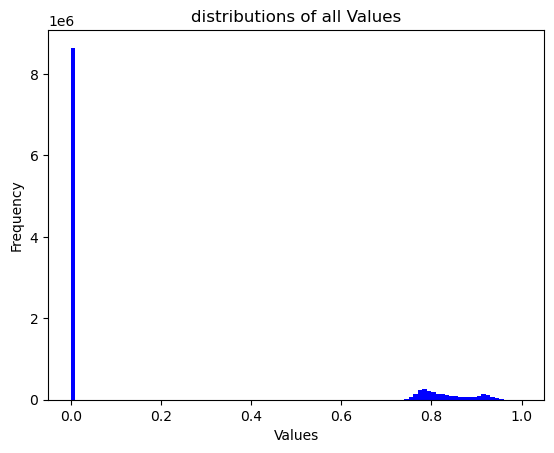

number of nonzero values = 2475374
Generated images:


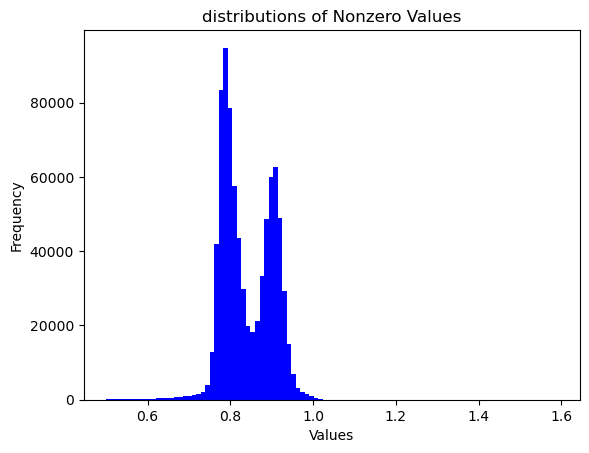

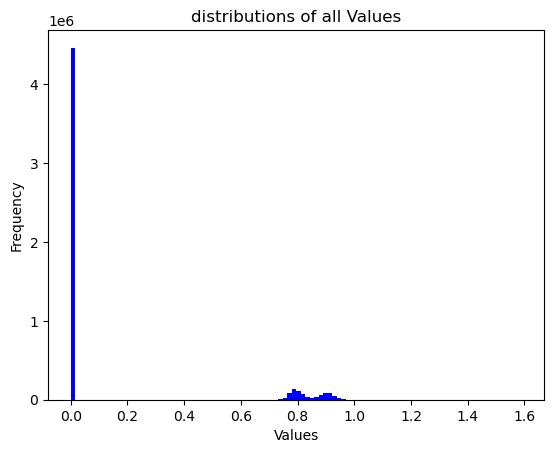

number of nonzero values = 831758


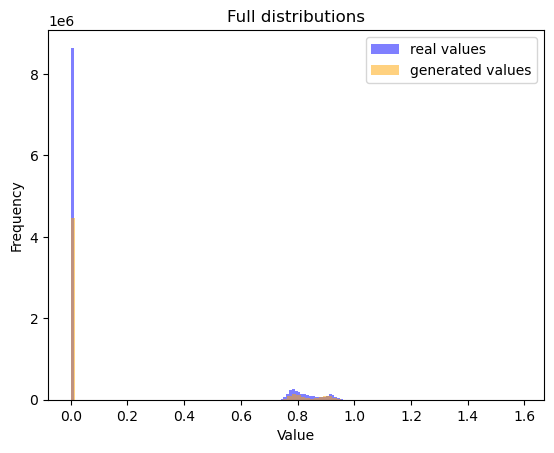

Full distribution:
KS Statistic: 0.06785877437257082
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0007:
The distributions are significantly different (reject H0), KS statistic 0.0679 > 0.0007


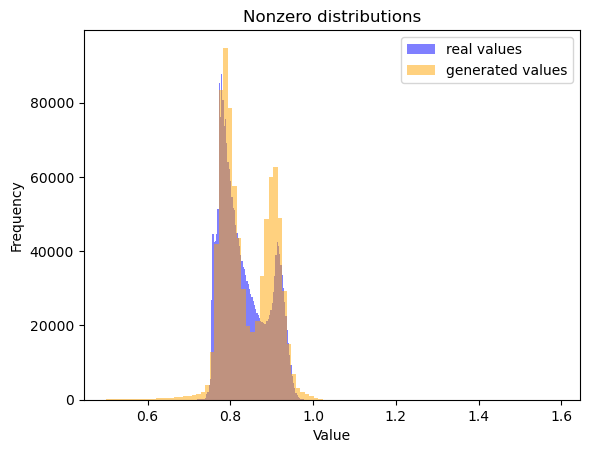

Nonzero distribution:
KS Statistic: 0.10306153430767262
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0017:
The distributions are significantly different (reject H0), KS statistic 0.1031 > 0.0017


(0.06785877437257082, 0.10306153430767262)

In [46]:
og = torch.load("data/dataset_distlognorm_massnorm.pt")
ks_test(og, nearest_con2, dim = 1)